In [2]:
import pandas as pd 
import matplotlib.pyplot as mp
import numpy
import tkinter as tk 
from tkinter import filedialog, Text
import os

<AxesSubplot:title={'center':'Deep learning angle percentages per file'}, ylabel='Files'>

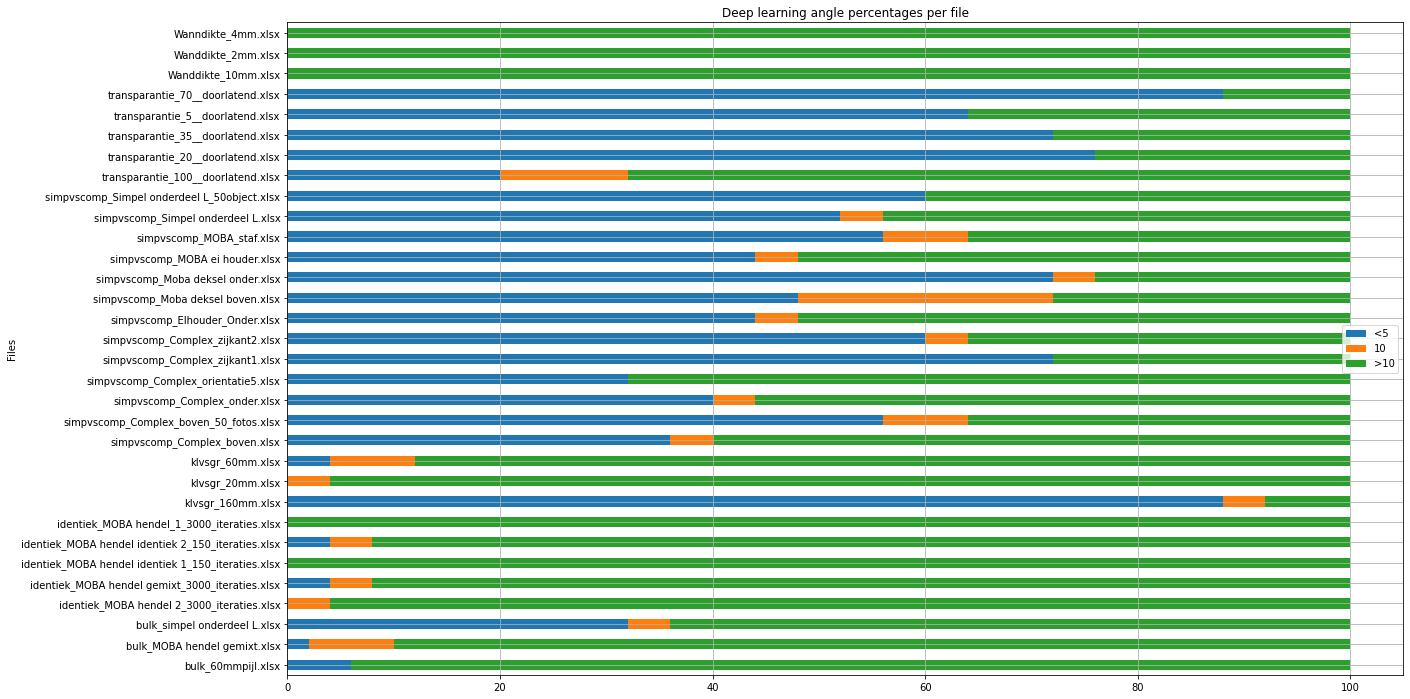

In [3]:
#This program calculates the percentage of perfect, average and not acceptable angles per experiment
#Author: Arie Hoekstra

#Directory we want to search
directory = "Excel Resultaten"
#List to store all the files with path
excel = []
#List with just the file names
files = []
y = 0

#Loop over all the files in the directory    
for file in os.listdir(directory):
    #decode
     filename = os.fsdecode(file)
     if filename.endswith(".xlsx"):
         #store path to file in temp variable
         temp = os.path.join(directory, filename) 
         #insert into the excel
         excel.insert(y, temp)
         y = y + 1
         continue
     else:
         continue

i = 0
#array to store all calculated values
lower = []
medium = []
high = []

#Loop over all the excel sheets
for sheet in excel:
    #Select the J column (Deep learning angles)
    df = pd.read_excel(sheet, usecols="J")
    #Retrieve <5 angles from 27th row from the J column multiply by 100 to show percentages
    lower_than_5 = df.iat[27,0] * 100
    #Retrieve the >5 and <10 angles
    lower_than_10 = df.iat[28,0] * 100
    #Retrieve >10 angles
    greater_than_10 = df.iat[29,0] * 100

    #insert values in the corresponding lists
    lower.insert(i, lower_than_5)
    medium.insert(i, lower_than_10)
    high.insert(i, greater_than_10)

    #Delete the directory name from the path
    files.insert(i, sheet.replace('Excel Resultaten\\', ''))
    i = i + 1

#Create dataframe
df = pd.DataFrame()
#Add 4 columns with the names and the values
df['<5'] = lower
df['10'] = medium
df['>10'] = high
df['Files'] = files

#Export dataframe to excel 
df.to_excel('totalscore.xlsx', index=False)

#Get data from the excel
df = pd.read_excel('totalscore.xlsx')
#Plot the graph
df.plot(x='Files', kind="barh", figsize=(20,12), xlabel="Files", ylabel = "Percentage", title="Deep learning angle percentages per file", grid=True, stacked=True)